In [32]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
df=pd.read_csv('happines_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.shape

(158, 12)

158 column 12 row

In [5]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [6]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

changing data types

In [7]:
lencode=LabelEncoder()
df['Country']=lencode.fit_transform(df['Country'])
df['Region']=lencode.fit_transform(df['Region'])
df['Happiness Rank']=lencode.fit_transform(df['Happiness Rank'])
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,152,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,153,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,154,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,155,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [8]:
df.dtypes

Country                            int32
Region                             int32
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

<AxesSubplot:xlabel='Happiness Score', ylabel='count'>

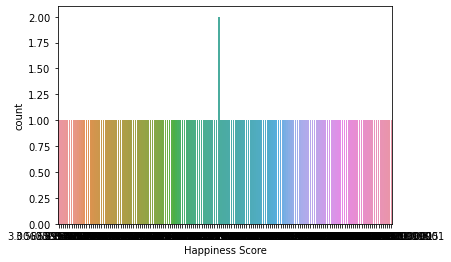

In [9]:
sn.countplot(df['Happiness Score'])

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

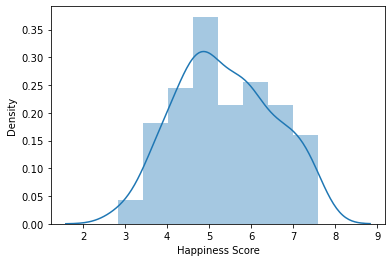

In [10]:
sn.distplot(df['Happiness Score'])

count plot and displot

In [11]:
data=pd.DataFrame(df)
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,152,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,153,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,154,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,155,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [12]:
data.keys()

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

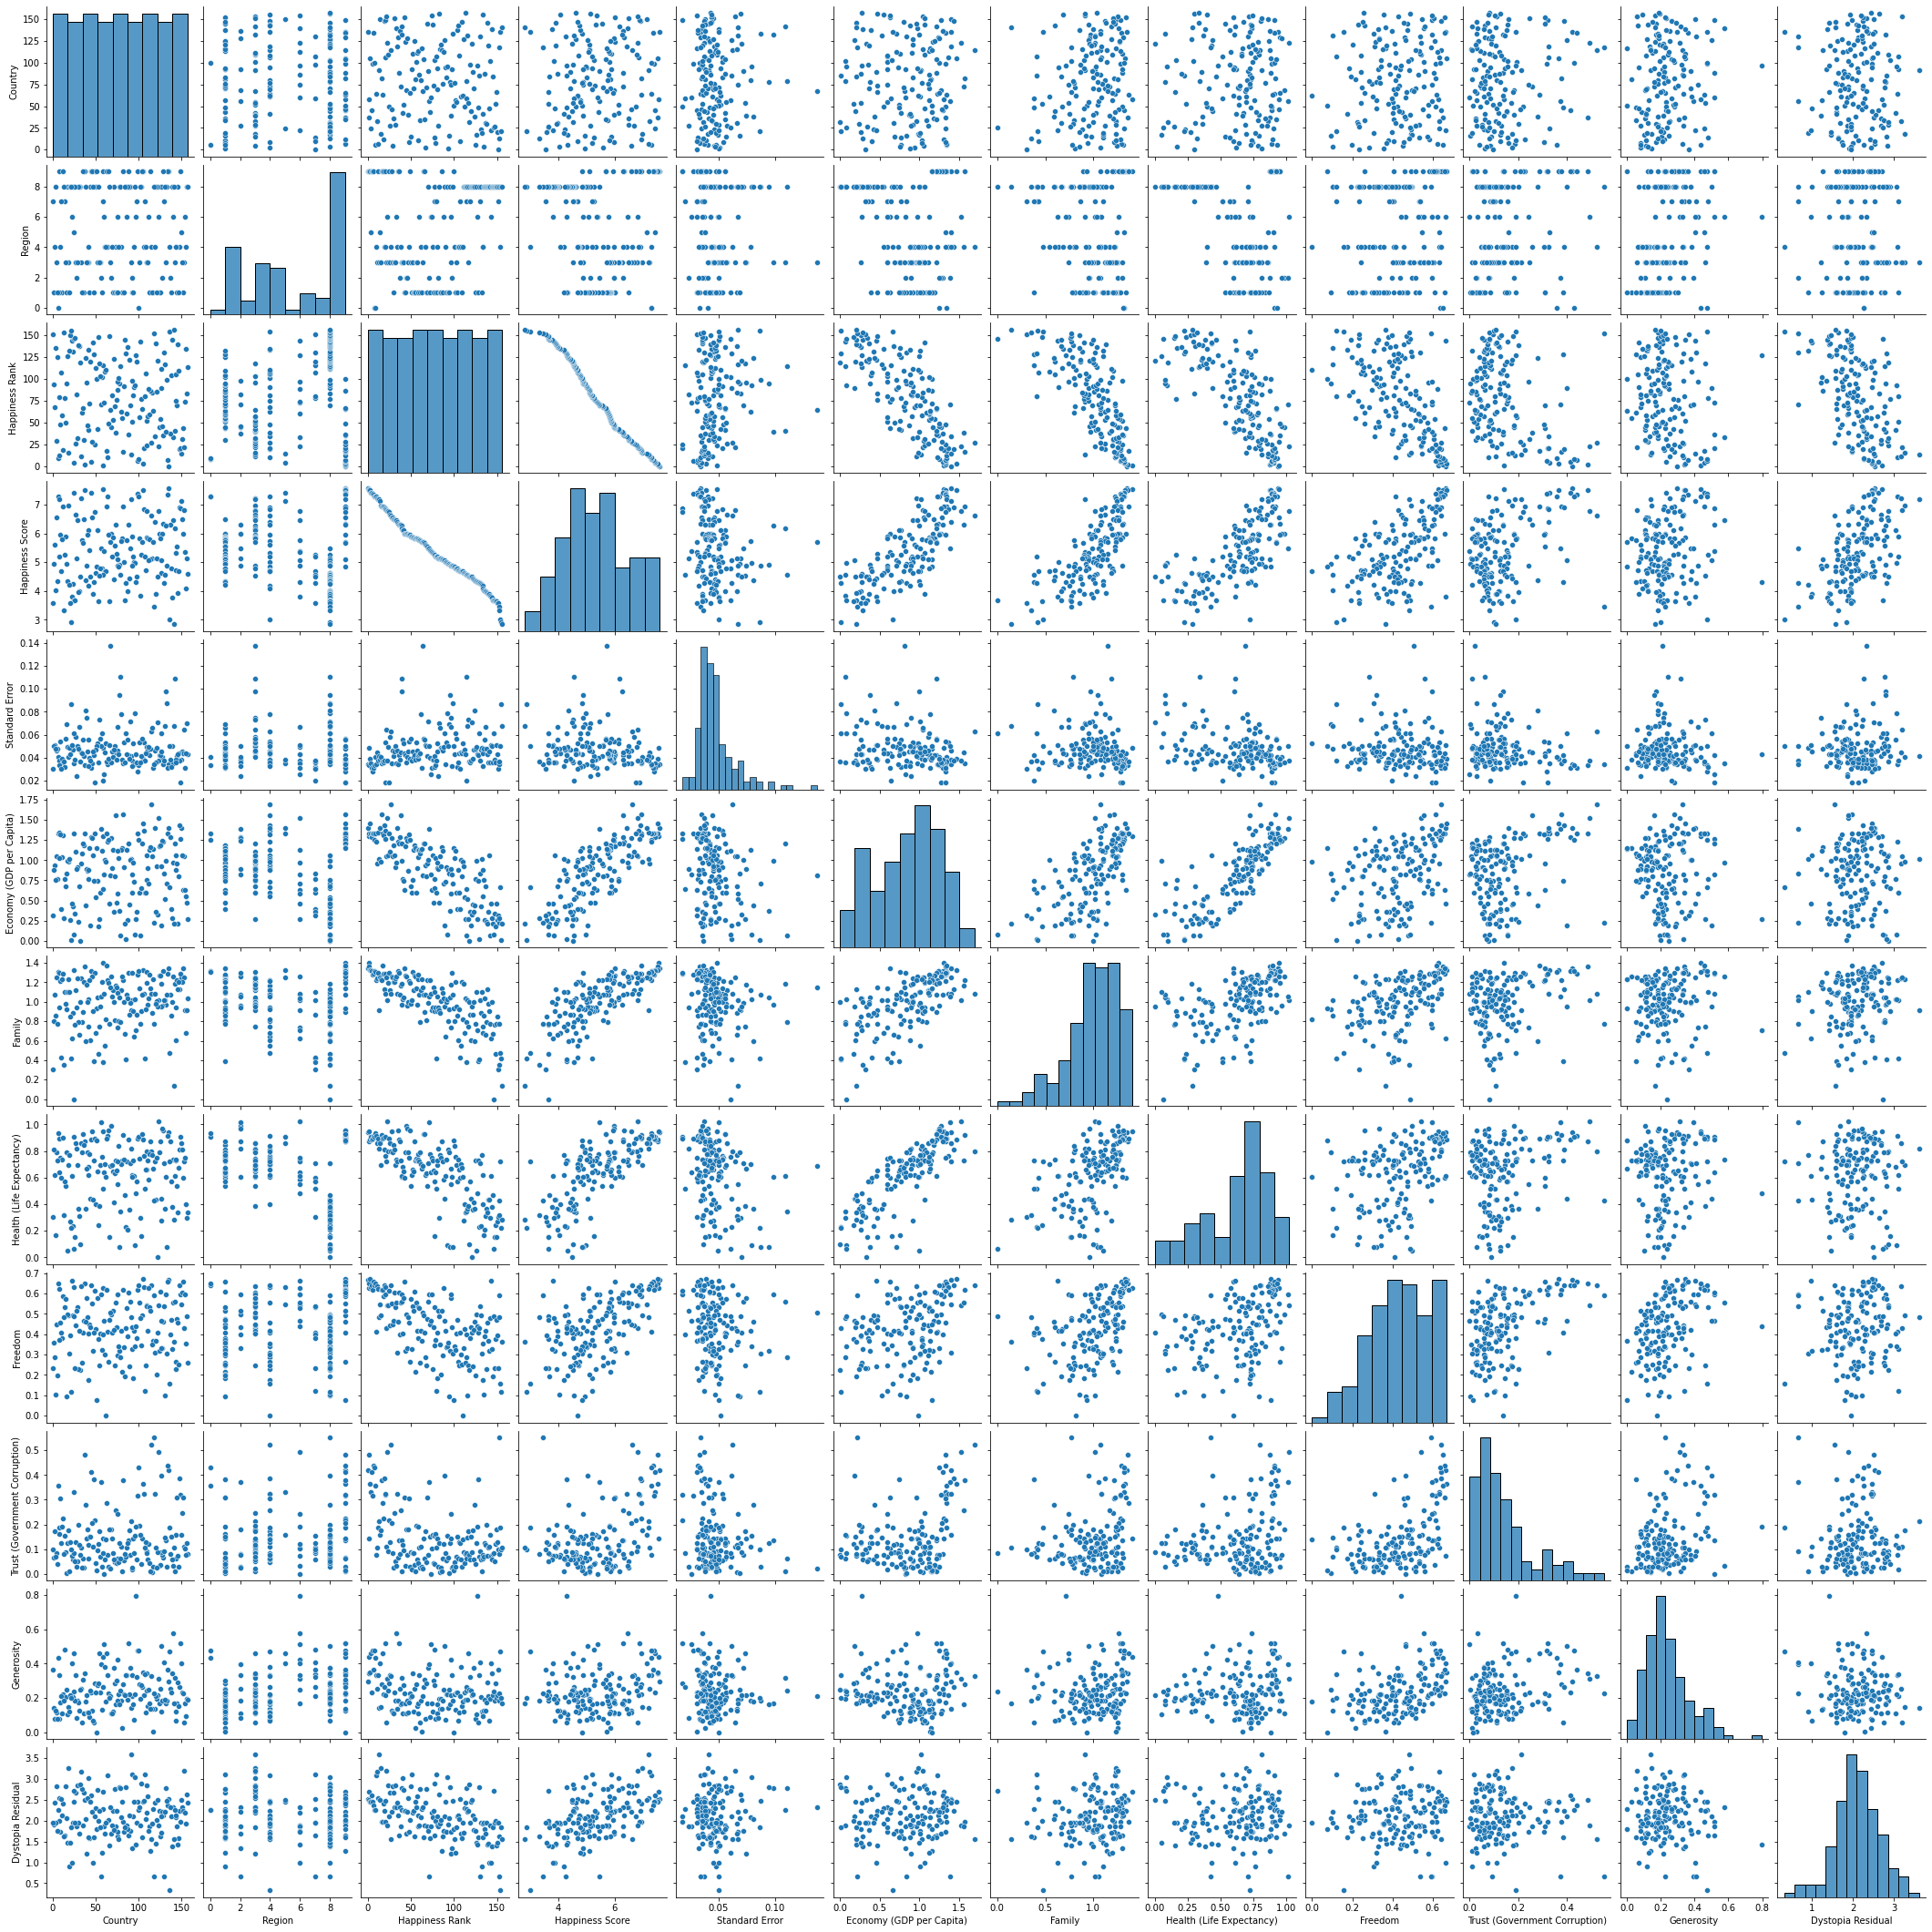

In [13]:
sn.pairplot(df)

In [14]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                  -0.001271
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [15]:
df.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098804,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213092,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098804,0.213092,1.000000,-0.992418,0.158201,-0.785211,-0.733899,-0.735642,-0.557051,-0.372752,-0.160446,-0.522339
Happiness Score,0.083380,-0.176791,-0.992418,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158201,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785211,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733899,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735642,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.557051,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372752,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


<AxesSubplot:>

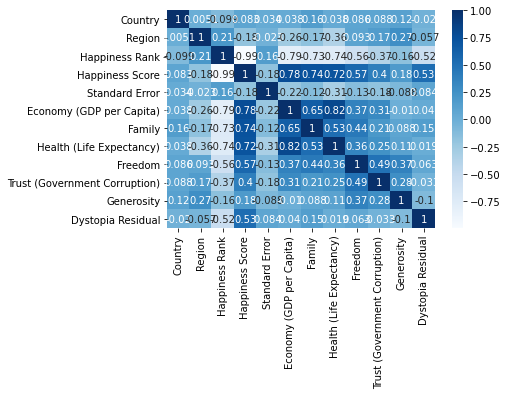

In [16]:
sn.heatmap(df.corr(),cmap='Blues',annot=True)

heat map

In [17]:
from scipy.stats import zscore

In [18]:
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))


z score program

In [19]:
dfnew=df[(dfzscore<3).all(axis=1)]

In [20]:
print('dfnew.shape=',dfnew.shape)

dfnew.shape= (149, 12)


In [21]:
df=dfnew
df.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.007739,-0.125779,0.120109,0.003898,0.039300,0.202403,0.036875,0.091495,0.062379,0.096685,0.048980
Region,0.007739,1.000000,0.183825,-0.145850,-0.013860,-0.224928,-0.127749,-0.334531,0.101335,0.167550,0.305791,-0.059494
Happiness Rank,-0.125779,0.183825,1.000000,-0.993229,0.211359,-0.773607,-0.720548,-0.736826,-0.571374,-0.446330,-0.226005,-0.526947
Happiness Score,0.120109,-0.145850,-0.993229,1.000000,-0.230252,0.773577,0.720868,0.729191,0.585066,0.477692,0.250903,0.528334
Standard Error,0.003898,-0.013860,0.211359,-0.230252,1.000000,-0.251749,-0.137879,-0.356444,-0.186465,-0.140156,-0.131970,0.045722
Economy (GDP per Capita),0.039300,-0.224928,-0.773607,0.773577,-0.251749,1.000000,0.628589,0.817470,0.376780,0.342269,0.020730,0.026936
Family,0.202403,-0.127749,-0.720548,0.720868,-0.137879,0.628589,1.000000,0.503890,0.474229,0.258646,0.154011,0.118062
Health (Life Expectancy),0.036875,-0.334531,-0.736826,0.729191,-0.356444,0.817470,0.503890,1.000000,0.382595,0.270605,0.129328,0.031212
Freedom,0.091495,0.101335,-0.571374,0.585066,-0.186465,0.376780,0.474229,0.382595,1.000000,0.506373,0.428718,0.058596
Trust (Government Corruption),0.062379,0.167550,-0.446330,0.477692,-0.140156,0.342269,0.258646,0.270605,0.506373,1.000000,0.296450,0.078080


<AxesSubplot:>

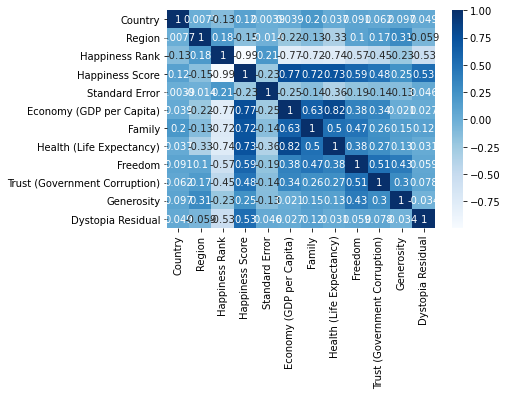

In [23]:
sn.heatmap(df.corr(),cmap='Blues',annot=True)

new heat map

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
x=df.iloc[:,0:-1]
x

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,135,9,0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,58,9,1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,37,9,2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,105,9,3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,24,5,4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,149,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165
151,20,8,150,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747
152,0,7,151,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510
154,13,8,153,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260


In [26]:
y=df.iloc[:,-1]
y

0      2.51738
1      2.70201
2      2.49204
3      2.46531
4      2.45176
        ...   
150    1.41723
151    1.46494
152    1.95210
154    1.63328
156    1.83302
Name: Dystopia Residual, Length: 149, dtype: float64

In [28]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [29]:
vif_calc()

    VIF Factor                       features
0     4.080483                        Country
1     5.537890                         Region
2     5.669761                 Happiness Rank
3    95.401717                Happiness Score
4    13.730871                 Standard Error
5    27.385096       Economy (GDP per Capita)
6    41.730607                         Family
7    32.985146       Health (Life Expectancy)
8    17.831476                        Freedom
9     4.025643  Trust (Government Corruption)
10    7.087278                     Generosity


vif calculation

In [33]:
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 1.26826032,  1.29683671, -1.72002965, ...,  1.58370387,
         2.47225453,  0.54630526],
       [-0.41741515,  1.29683671, -1.69744355, ...,  1.33895344,
         0.00924715,  1.71389767],
       [-0.87714482,  1.29683671, -1.67485746, ...,  1.47602698,
         3.03674718,  0.91963022],
       ...,
       [-1.68714472,  0.63509469,  1.69047067, ..., -1.28566246,
        -0.38241996,  1.11805063],
       [-1.40255016,  0.9659657 ,  1.73564285, ...,  0.37943861,
        -0.53365337, -0.40922585],
       [-1.22741505,  0.9659657 ,  1.78081504, ..., -2.0547641 ,
        -0.35206708, -0.28645792]])

In [34]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=55)

In [35]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr.coef_

array([ 1.97636911e-05,  1.09455097e-04,  1.35584470e-04,  1.10763294e+00,
        3.87518044e-05, -3.86685564e-01, -2.51052466e-01, -2.45007247e-01,
       -1.50289853e-01, -1.13047983e-01, -1.19562149e-01])

In [36]:
lr.intercept_

2.1208802133627445

In [37]:
lr.score(xtrain,ytrain)

0.9999997563228055

In [38]:
pred=lr.predict(xtest)
pred

array([2.26617948, 2.32307183, 2.26390451, 1.44425454, 1.34717935,
       2.53353413, 1.68169297, 1.83346764, 3.26039294, 2.83598242,
       3.19124591, 1.86949133, 1.57045202, 2.12403098, 1.94272208,
       1.86415772, 2.00064874, 2.23745705, 1.5881869 , 1.69478915,
       1.26530965, 2.63455858, 2.02483605, 1.95848022, 1.62250792,
       2.2015961 , 2.44852144, 2.44683284, 2.10990906, 1.8898372 ,
       3.17759997, 2.70232135, 2.04408261, 1.63328572, 2.32129148,
       2.43245155, 2.23216357, 1.97550969, 1.75873237, 2.18854368,
       1.59902271, 1.73825584, 1.99175158, 2.79084242, 1.84414651])

In [39]:
print('Predicted values',pred)

Predicted values [2.26617948 2.32307183 2.26390451 1.44425454 1.34717935 2.53353413
 1.68169297 1.83346764 3.26039294 2.83598242 3.19124591 1.86949133
 1.57045202 2.12403098 1.94272208 1.86415772 2.00064874 2.23745705
 1.5881869  1.69478915 1.26530965 2.63455858 2.02483605 1.95848022
 1.62250792 2.2015961  2.44852144 2.44683284 2.10990906 1.8898372
 3.17759997 2.70232135 2.04408261 1.63328572 2.32129148 2.43245155
 2.23216357 1.97550969 1.75873237 2.18854368 1.59902271 1.73825584
 1.99175158 2.79084242 1.84414651]


In [40]:
preddf=pd.DataFrame(data=pred)
preddf

,0
0,2.266179
1,2.323072
2,2.263905
3,1.444255
4,1.347179
5,2.533534
6,1.681693
7,1.833468
8,3.260393
9,2.835982


In [41]:
lr.score(xtest,ytest)

0.9999995761908415

lr score

In [42]:
print('Mean absolute error::',mean_absolute_error(ytest,pred)) 
print('Mean squared error::',mean_squared_error(ytest,pred))
print('Root mean square::',np.sqrt(mean_squared_error(ytest,pred)))

Mean absolute error:: 0.0002656451821430138
Mean squared error:: 9.428087912041694e-08
Root mean square:: 0.00030705191600186596


In [43]:
print('R2 score::',r2_score(ytest,pred))

R2 score:: 0.9999995761908415


calculating r2 score

In [44]:
lm=LinearRegression()
lm.fit(xtrain,ytrain)
lm.score(xtrain,ytrain)
pred=lm.predict(xtest)
print('Predicted result:',pred)
print('actual',ytest)

Predicted result: [2.26617948 2.32307183 2.26390451 1.44425454 1.34717935 2.53353413
 1.68169297 1.83346764 3.26039294 2.83598242 3.19124591 1.86949133
 1.57045202 2.12403098 1.94272208 1.86415772 2.00064874 2.23745705
 1.5881869  1.69478915 1.26530965 2.63455858 2.02483605 1.95848022
 1.62250792 2.2015961  2.44852144 2.44683284 2.10990906 1.8898372
 3.17759997 2.70232135 2.04408261 1.63328572 2.32129148 2.43245155
 2.23216357 1.97550969 1.75873237 2.18854368 1.59902271 1.73825584
 1.99175158 2.79084242 1.84414651]
actual 9      2.26646
37     2.32323
8      2.26425
141    1.44395
99     1.34759
12     2.53320
138    1.68135
156    1.83302
15     3.26001
29     2.83600
22     3.19131
69     1.86984
102    1.57059
35     2.12367
148    1.94296
73     1.86399
79     2.00073
43     2.23741
72     1.58782
109    1.69440
87     1.26462
84     2.63430
86     2.02500
139    1.95812
88     1.62215
74     2.20173
121    2.44876
55     2.44649
90     2.11032
66     1.88931
11     3.17728
1      

In [45]:
print('error:')
print(mean_squared_error(pred,ytest))

error:
9.428087912041694e-08


calculation error

In [46]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.0001)
ls.fit(xtrain,ytrain)
ls.score(xtrain,ytrain)

0.9999943428582186

lasso calculation

In [47]:
ls.coef_

array([ 0.00000000e+00,  2.31059110e-04, -1.25622847e-02,  1.09383225e+00,
       -1.70219310e-05, -3.86419119e-01, -2.50665929e-01, -2.45081258e-01,
       -1.50302642e-01, -1.12247387e-01, -1.19218230e-01])

In [48]:
rd=Ridge(alpha=0.0001)
rd.fit(xtrain,ytrain)
rd.score(xtrain,ytrain)

0.9999997558251612

Ridge calculation

In [49]:
rd.coef_

array([ 1.98853618e-05,  1.12678196e-04,  6.03622151e-06,  1.10749582e+00,
        3.70121742e-05, -3.86683695e-01, -2.51050263e-01, -2.45008721e-01,
       -1.50290280e-01, -1.13041677e-01, -1.19560328e-01])

In [50]:
from sklearn.svm import SVR

In [51]:
svr = SVR(kernel = 'linear')
svr.fit(xtrain,ytrain)
svr.score(xtrain,ytrain)
pred_y=svr.predict(xtest)

In [52]:
svr = SVR(kernel = 'poly')
svr.fit(xtrain,ytrain)
svr.score(xtrain,ytrain)
pred_y=svr.predict(xtest)

In [53]:
svr = SVR(kernel = 'rbf')
svr.fit(xtrain,ytrain)
svr.score(xtrain,ytrain)
pred_y=svr.predict(xtest)

In [54]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(xtrain,ytrain)
    print(sv.score(xtrain,ytrain))

0.9887152672431758
0.8437363593151197
0.9709478722299734


calculation on svr technique